# assignment2_zhou_xi

*If the computing power of the computer is not enough, running the plot will cause the server to crash and the drawn image will not be displayed. I tried to solve the drawing problem by using the computer in the lab instead of using my own laptop.

In order to prevent the same problem from occurring, I will paste the picture drawn in the answer for reference.

In [45]:
import os
base_dir = './cat_dog_car_bike'
train_dir = './cat_dog_car_bike/train' 
val_dir = './cat_dog_car_bike/val'
test_dir = './cat_dog_car_bike/test'

train_cats_dir=os.path.join(train_dir,'c0')
train_dogs_dir=os.path.join(train_dir,'c1')
train_cars_dir=os.path.join(train_dir,'c2')
train_motorbikes_dir=os.path.join(train_dir,'c3')
test_cats_dir=os.path.join(test_dir,'c0')
test_dogs_dir=os.path.join(test_dir,'c1')
test_cars_dir=os.path.join(test_dir,'c2')
test_motorbikes_dir=os.path.join(test_dir,'c3')
val_cats_dir=os.path.join(val_dir,'c0')
val_dogs_dir=os.path.join(val_dir,'c1')
val_cars_dir=os.path.join(val_dir,'c2')
val_motorbikes_dir=os.path.join(val_dir,'c3')

## Question1：CNN architecture

In [46]:
#Use the sigmoid activation function for all layers but the last one which uses the softmax activation function. Use default values for the parameters which are not specified above.
import tensorflow
from tensorflow import keras
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),padding='same',activation='sigmoid',#add the padding—for question1(b)
                        input_shape=(32, 32, 3))) #since we rescale the input pictures to 32*32,the input_shape shoude be (32,32,3)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding='same', activation='sigmoid')) #add the padding—for question1(b)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same',activation='sigmoid')) #add the padding—for question1(b)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),padding='same',activation='sigmoid')) #add the padding—for question1(b)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='sigmoid'))
model.add(layers.Dense(4, activation='softmax')) # k=4

In [47]:
## Configuration for training
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_132 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_133 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_134 (MaxPoolin (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 4, 4, 128)         147584    
__________

## Quesion1_answers
- (a) the right value for k should be 4,since we have 4 classes:cats,dogs,cars,motorbikes,so the size of output should be 4.
- (6) The issue in the architecurte of previous CNN is 'Negative dimension appears'.The reason for the problem is that the feature map will shrink through each conv2D layer when there is no padding.We should add padding to the conv2D layers,using the code 'padding='same'.the padding parameter has two values:'valid' and 'same',‘valid’ means no padding,‘same’ means that the output size is the same as the input after using padding,the default value of the parameter is ‘valid’, we should change it to ‘same’.

## Question2：Training a small CNN from scratch

In [48]:
import PIL
from keras import optimizers
model.compile(loss='categorical_crossentropy', #We should change the binary_crossentropy to categorical_crossentropy,since now we have 4 classes
            optimizer=optimizers.RMSprop(lr=0.1),
            metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) #rescale the tensor values to [0,1]
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=20,class_mode='categorical') #we have four classes

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')

print ("start..")
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50) 

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
start..
Epoch 1/10
100/100 [==============================] - 11s 111ms/step - loss: 12.2470 - acc: 0.2313 - val_loss: 12.2303 - val_acc: 0.2412
Epoch 2/10
100/100 [==============================] - 9s 88ms/step - loss: 12.3330 - acc: 0.2348 - val_loss: 12.4085 - val_acc: 0.2302
Epoch 3/10
100/100 [==============================] - 9s 89ms/step - loss: 12.2767 - acc: 0.2383 - val_loss: 12.4085 - val_acc: 0.2302
Epoch 4/10
100/100 [==============================] - 9s 88ms/step - loss: 12.3061 - acc: 0.2365 - val_loss: 12.2627 - val_acc: 0.2392
Epoch 5/10
100/100 [==============================] - 9s 88ms/step - loss: 12.3491 - acc: 0.2338 - val_loss: 12.2627 - val_acc: 0.2392
Epoch 6/10
100/100 [==============================] - 9s 87ms/step - loss: 12.4216 - acc: 0.2293 - val_loss: 12.4060 - val_acc: 0.2303
Epoch 7/10
100/100 [==============================] - 9s 89ms/step - loss: 12.1180 - acc: 0.2482 

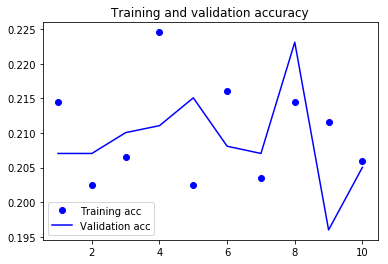

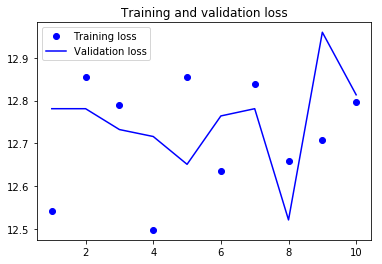

In [14]:
#plot for the question2 (a):
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Question2_answers:

- loss function:change the binary_crossentropy to categorical_crossentropy,since now we have 4 classes

## (a) 


plots for question2(a) are showing below(with learning rate=0.1),the volatility of the data points is very large,and there is no convergence.

The main reasons are:

(1)the learning rate is too large, so the training process is overshooting;

(2)the activation functiong is sigmoid,since the output of sigmoid function is not zero-centered,we get zig-zag patterns for gradient descent. 
![image](./question2a1.jpeg)
![image](./question2a2.jpeg)
## (b) 

***2 parameters***:

according to our analysis above,we should change the learning rate as well as activation function.After lower the learning rate and change the activation function from 'sigmoid' to 'tanh'(I have also tried 'relu',but the 'tanh' performs better in terms of accuracy),the accuracy increased.

***the imapact of learning rate***:

if the rate is too small,then there has to be a lot of iterations until convergence,and the training process maybe trapped in local minimum;if the rate is too large,the overshooting problem may appears and there maybe no convergence.


***the imapact of activation function***:

sigmoid function may cause vanishing gradient as well as zig-zag problem.


I have also plot the the training/validation accuracy and training/validation loss as a function of the epochs after tuning the 2 parameters (see below)

In [49]:
#change the learning rate as well as the activation function for question2(b)
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),padding='same',activation='tanh',#add the padding
                        input_shape=(32, 32, 3))) #since we rescale the input pictures to 32*32,the input_shape shoude be (32,32,3)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding='same', activation='tanh')) #add the padding
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same',activation='tanh')) #add the padding
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),padding='same',activation='tanh')) #add the padding
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='tanh'))
model.add(layers.Dense(4, activation='softmax')) # k=4

model.compile(loss='categorical_crossentropy', #change the binary_crossentropy to categorical_crossentropy,since now we have 4 classes
            optimizer=optimizers.RMSprop(lr=0.9e-3),
            metrics=['acc'])

In [50]:
# train_dir="../sample1000/train"
# validation_dir="../sample1000/val"
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) #rescale the tensor values to [0,1]
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical') #we only have two classes

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.


In [51]:
print ("start..")
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50) 

start..
Epoch 1/10
100/100 [==============================] - 12s 124ms/step - loss: 0.8671 - acc: 0.6455 - val_loss: 0.5409 - val_acc: 0.7045
Epoch 2/10
100/100 [==============================] - 10s 99ms/step - loss: 0.4375 - acc: 0.7963 - val_loss: 0.3945 - val_acc: 0.8352
Epoch 3/10
100/100 [==============================] - 9s 93ms/step - loss: 0.3023 - acc: 0.8643 - val_loss: 0.4411 - val_acc: 0.7930
Epoch 4/10
100/100 [==============================] - 9s 91ms/step - loss: 0.1948 - acc: 0.9160 - val_loss: 0.4161 - val_acc: 0.8523
Epoch 5/10
100/100 [==============================] - 9s 92ms/step - loss: 0.1190 - acc: 0.9513 - val_loss: 0.4654 - val_acc: 0.8633
Epoch 6/10
100/100 [==============================] - 9s 91ms/step - loss: 0.0689 - acc: 0.9760 - val_loss: 0.5172 - val_acc: 0.8616
Epoch 7/10
100/100 [==============================] - 9s 93ms/step - loss: 0.0402 - acc: 0.9868 - val_loss: 0.5667 - val_acc: 0.8683
Epoch 8/10
100/100 [==============================] - 9s 9

In [52]:
model.save('cat_dog_car_bike.h5') 

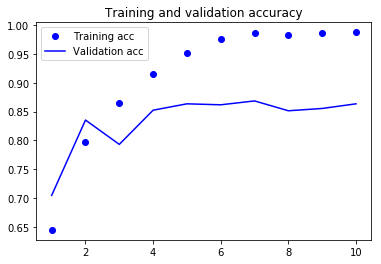

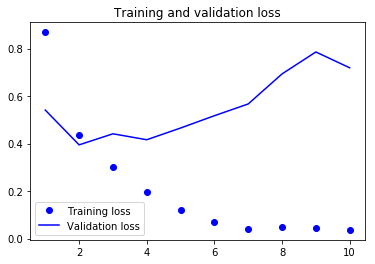

In [53]:
#plot for the question2 (b):
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

(I also plot both the training/validation accuracy and training/validation loss as a function of the epochs after changing these 2 parameters,and the pictures are shown below:)
![image](./question2b1.jpeg)
![image](./question2b2.jpeg)



***End of the question 2***


## Question3(Optimize the learning rate)


## a) 

***（a) try to find a wide enough learning rate range,recording the val_acc after 10 epoches:***

***a wide enough range can be***:(1e-7,1.5e-3)
- 1e-7:0.2613 #lower bound
- 1e-6:0.5729 
- 1e-5:0.6925 
- 1e-4:0.8312
- 1e-3:0.8543 #The promotion is not obvious, and the accuracy has fallen during some iterations (the increase of accuracy is not stable). Overshotting may have occurred.
- 1e-2:0.2302 #Apparent overshooting has appeared, an upper bound of learning rate can be exist between 1e-3 and 1e-2
- 5e-3:0.2141
- 2.5e-3:0.2945
- 1.5e-3：0.2824 #using 1.5e-3 as the upper bound of the learning rate

***try to find the optimal learning rate***:the optimal learning rate can be around 9.5e-4 (0.95e-3).
- 5e-4: 0.8291 
- 7.5e-4：0.8482
- 8.5e-4：0.8412
- 9.5e-4:0.8523
- 9.75e-4: 0.8402
- 9.95e-4:  0.8020
- 1.05e-3：0.8352



## b)

 **(b) Provide an example of a learning rate which is “bad”, “good” and “very good”. Motivate your answer.**
 
- bad: When the learning rate is 1e-7, the accuracies on the training set and the validation set are less than 0.3, because the learning rate is too low at that time, and it is not enough to learn a useful pattern within 10 epochs;


- good：When the learning rate is 4.5e-5, the acc of the validation set rises from the initial 0.6+ to 0.7799. However the highest accuracy is not achieved within 10 epochs,and the acc of first epoch is quite low,so this learning rate maybe a bit low;


- very good：When the learning rate is 0.95e-3, the accuracy of the validation set rises from the initial 0.7497 to 0.8523, and the classification accuracy of the training set increases from 0.6+ to 0.9+.

## Question4 Transfer Learning


In [54]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(32, 32, 3)) 
#remove the top layer, VGG was trained for 1000 classes, here we only have four
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

### Feature Extraction (with Data Augmentation)

We add other layers on top of conv_base

In [55]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_35 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_70 (Dense)             (None, 4)                 1028      
Total params: 14,847,044
Trainable params: 14,847,044
Non-trainable params: 0
_________________________________________________________________


In [56]:
#this "freezes" the VGGNet
conv_base.trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_35 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_70 (Dense)             (None, 4)                 1028      
Total params: 14,847,044
Trainable params: 132,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [44]:
import os
base_dir = './cat_dog_car_bike'
train_dir = './cat_dog_car_bike/train' 
val_dir = './cat_dog_car_bike/val'
test_dir = './cat_dog_car_bike/test'

train_cats_dir=os.path.join(train_dir,'c0')
train_dogs_dir=os.path.join(train_dir,'c1')
train_cars_dir=os.path.join(train_dir,'c2')
train_motorbikes_dir=os.path.join(train_dir,'c3')
test_cats_dir=os.path.join(test_dir,'c0')
test_dogs_dir=os.path.join(test_dir,'c1')
test_cars_dir=os.path.join(test_dir,'c2')
test_motorbikes_dir=os.path.join(test_dir,'c3')
val_cats_dir=os.path.join(val_dir,'c0')
val_dogs_dir=os.path.join(val_dir,'c1')
val_cars_dir=os.path.join(val_dir,'c2')
val_motorbikes_dir=os.path.join(val_dir,'c3')

from tensorflow import keras
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=20,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/20
100/100 [==============================] - 12s 119ms/step - loss: 11.3538 - acc: 0.2728 - val_loss: 1.2838 - val_acc: 0.5960
Epoch 2/20
100/100 [==============================] - 9s 94ms/step - loss: 0.8405 - acc: 0.6735 - val_loss: 3.3989 - val_acc: 0.3015
Epoch 3/20
100/100 [==============================] - 9s 93ms/step - loss: 0.7152 - acc: 0.7110 - val_loss: 0.7520 - val_acc: 0.7296
Epoch 4/20
100/100 [==============================] - 9s 91ms/step - loss: 0.6315 - acc: 0.7440 - val_loss: 1.1743 - val_acc: 0.6442
Epoch 5/20
100/100 [==============================] - 9s 92ms/step - loss: 0.5723 - acc: 0.7788 - val_loss: 0.9154 - val_acc: 0.6985
Epoch 6/20
100/100 [==============================] - 9s 91ms/step - loss: 0.5721 - acc: 0.7627 - val_loss: 1.4446 - val_acc: 0.6020
Epoch 7/20
100/100 [==============================] - 9s 90ms/step - loss: 0.5279 - acc: 0.7970 - val_loss: 1.0888 -

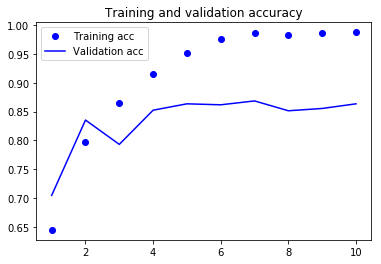

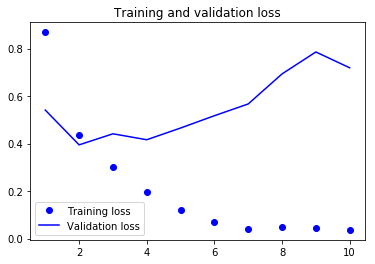

In [57]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

***plots***

![accFeat.png](image3.jpeg)


***comments on the plot***


Above we used the pretrained network VGG16, which is a network trained on ImageNet. For deep learning, if the training data set is large enough and versatile, the spatial hierarchy of the features learned by the pretrained network can be effectively used as a general model of the visual world.

The CNN model consists of two parts, one part is the convolutional base and the other is the dense layers. For CNN, feature extraction is to take out the convolutional base of the pretrained network, run new data on it, and then train a new classifier on the output.

Before using the VGG16 convolutional base, our model was trained on a very small training set, so there was a serious overfitting problem, that is, although the accuracy on the training set increased with the increase of number of the epochs, the accuracy on the evaluation set was decreasing.

This is because the model has begun to learn some of the properties specific to the training set image rather than the features common to all images.

The best way to solve overfitting is to increase the amount of data in the training set. The more training data, the better the generalization ability of the model. So we used data augment to create more images. 

In addition,using the pretrained network which is trained on a large enought data set could also solve the problem of overfitting.

As can be seen from the above figure, although the accuracy of the training set is not improved, the accuracy of the validation is not high, but the gap between the two is very small, indicating that the overfitting problem is well solved. Next we try to improve the classification of accuracy by fine-tuning.

## Question 5 

**I tried 2 methods to increase the accuracy.**


**The first method is fine-tuning, using VGG16 as feature extractor;**

**The second one is using drop out, regularization to solve the problem of overfitting, and then fine-tune the learning rate as well as change the optimizer; I have also considered that the input image maybe not centered on zero, we need to rescale the image to make it zero centered.**

## method1:Fine Tuning(also using the VGG16 as feature extrator)
Fine tuning complements the above feature extraction (using VGG16).

Fine tuning is to thaw the top layers of the convolutional base of the VGG16 and combine the thawed layers with the newly added fully connected dense layers.

The thawed layers participate in random initialization with the dense layers and then participate in the training process,making the resulting model more relevant to the data set being trained.

Before we do fine-tuning, check the structure of the current convolutional base：

In [ ]:
conv_base.summary()

The CNN structure is shown above.

We try to fine-tune the convolutional layer of block5, because the near-bottom layers encodes more general reusable features (such as arcs or lines) and the layers near the top encode features more specialized to the training dataset.

We should fine-tune these less general-purpose layers based on the specific training data set to make the model more suitable for the data set we want to classify.

**I have tried to run 100 epochs to see the trend,and to save time,I also provided a 10-round version below, it seems that the 10 epochs version is as effective as 100 rounds.**

In [28]:
#I have tried to run 100 epochs to see the trend,and to save time,I also offer a 10 epochs version in below:
#100 epochs version
#we freeze all layers before block5_conv1
conv_base.trainable = True
set_trainable = False## Fine Tuning
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(lr=1e-5),
                      metrics=['acc'])#using a low eta to avoid breaking the structure
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 110s 1s/step - loss: 0.2956 - acc: 0.8664 - val_loss: 0.3271 - val_acc: 0.8651
Epoch 2/100
100/100 [==============================] - 109s 1s/step - loss: 0.2485 - acc: 0.8880 - val_loss: 0.3031 - val_acc: 0.8746
Epoch 3/100
100/100 [==============================] - 109s 1s/step - loss: 0.2494 - acc: 0.8872 - val_loss: 0.2717 - val_acc: 0.8852
Epoch 4/100
100/100 [==============================] - 108s 1s/step - loss: 0.2362 - acc: 0.8953 - val_loss: 0.3033 - val_acc: 0.8746
Epoch 5/100
100/100 [==============================] - 108s 1s/step - loss: 0.2288 - acc: 0.8969 - val_loss: 0.2797 - val_acc: 0.8894
Epoch 6/100
100/100 [==============================] - 108s 1s/step - loss: 0.2083 - acc: 0.9062 - val_loss: 0.2690 - val_acc: 0.8925
Epoch 7/100
100/100 [==============================] - 117s 1s/step - loss: 0.2059 - acc: 0.9086 - val_loss: 0.2706 - val_acc: 0.8899
Epoch 8/100
100/100 [==============================] - 111s 1s

Epoch 62/100
100/100 [==============================] - 110s 1s/step - loss: 0.1041 - acc: 0.9572 - val_loss: 0.2432 - val_acc: 0.9138
Epoch 63/100
100/100 [==============================] - 111s 1s/step - loss: 0.0977 - acc: 0.9619 - val_loss: 0.2317 - val_acc: 0.9167
Epoch 64/100
100/100 [==============================] - 112s 1s/step - loss: 0.1041 - acc: 0.9595 - val_loss: 0.2800 - val_acc: 0.9083
Epoch 65/100
100/100 [==============================] - 113s 1s/step - loss: 0.1060 - acc: 0.9569 - val_loss: 0.2729 - val_acc: 0.9098
Epoch 66/100
100/100 [==============================] - 112s 1s/step - loss: 0.0953 - acc: 0.9632 - val_loss: 0.2898 - val_acc: 0.9058
Epoch 67/100
100/100 [==============================] - 112s 1s/step - loss: 0.0947 - acc: 0.9610 - val_loss: 0.3210 - val_acc: 0.9010
Epoch 68/100
100/100 [==============================] - 110s 1s/step - loss: 0.1014 - acc: 0.9614 - val_loss: 0.3695 - val_acc: 0.8912
Epoch 69/100
100/100 [==============================] -

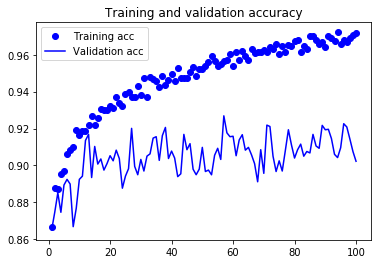

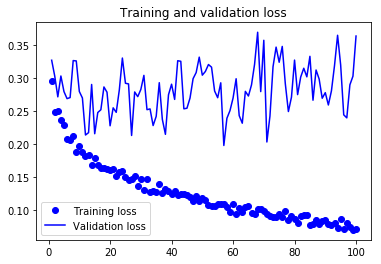

In [29]:
#plot 100 epochs
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [58]:
#change number of epoch to 10 to save time
conv_base.trainable = True
set_trainable = False## Fine Tuning
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(lr=1e-5),
                      metrics=['acc'])#using a low eta to avoid breaking the structure
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 112s 1s/step - loss: 0.4708 - acc: 0.7720 - val_loss: 0.3240 - val_acc: 0.8698
Epoch 2/10
100/100 [==============================] - 110s 1s/step - loss: 0.2659 - acc: 0.8967 - val_loss: 0.2393 - val_acc: 0.9008
Epoch 3/10
100/100 [==============================] - 112s 1s/step - loss: 0.2088 - acc: 0.9133 - val_loss: 0.1968 - val_acc: 0.9239
Epoch 4/10
100/100 [==============================] - 116s 1s/step - loss: 0.1648 - acc: 0.9353 - val_loss: 0.1880 - val_acc: 0.9176
Epoch 5/10
100/100 [==============================] - 114s 1s/step - loss: 0.1369 - acc: 0.9462 - val_loss: 0.1676 - val_acc: 0.9279
Epoch 6/10
100/100 [==============================] - 109s 1s/step - loss: 0.1174 - acc: 0.9534 - val_loss: 0.1640 - val_acc: 0.9308
Epoch 7/10
100/100 [==============================] - 109s 1s/step - loss: 0.1023 - acc: 0.9596 - val_loss: 0.1594 - val_acc: 0.9344
Epoch 8/10
100/100 [==============================] - 109s 1s/step - 

We plot the results and we got![question5first.png](question5first.png)![question5second.png](question5second.png)

*** Finally I got the accuracy of 0.9720 on training set and 0.9023 on validation set.***


     acc: 0.9720 - val_loss: 0.3638 - val_acc: 0.9023


- ## Method2 


- rescale the image to make it zero centered to avoid zig-zag problems.(compute mean of the data points and subtract the mean to each data point so that the mean of the input data points is zero.)

    using the code:
    
    train_datagen = ImageDataGenerator(samplewise_center=True,rescale=1./255)
    test_datagen = ImageDataGenerator(samplewise_center=True,rescale=1./255) 
    
    
- using drop out，using drop out, regularization to solve the problem of overfitting, and then fine-tune the learning rate as well as change the optimizer；

    
- However,after adding 0.5 drop out，acc did not increased，the code is：

   model.add(layers.Dropout(0.5)) 
   
   
    
- Adding l2 regularizer:


    model.add(layers.Dense(4,kernel_regularizer=regularizers.l2(0.0001),activation='softmax'))
    
    
- increase number of epochs from 20 to 40,val_acc rised to 0.8482.
    
- Adding image augment, although the overfitting situation has eased, the acc has not improved.

- change the 'tanh' to 'relu'  in order to gain faster convergence.



In [59]:
#using the CNN trained by myself,adding 0.5 dropout 

from tensorflow import keras
from keras import regularizers #import regularizer,adding the regularizer to dense layers
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import os
base_dir = './cat_dog_car_bike'
train_dir = './cat_dog_car_bike/train' 
val_dir = './cat_dog_car_bike/val'
test_dir = './cat_dog_car_bike/test'

train_cats_dir=os.path.join(train_dir,'c0')
train_dogs_dir=os.path.join(train_dir,'c1')
train_cars_dir=os.path.join(train_dir,'c2')
train_motorbikes_dir=os.path.join(train_dir,'c3')
test_cats_dir=os.path.join(test_dir,'c0')
test_dogs_dir=os.path.join(test_dir,'c1')
test_cars_dir=os.path.join(test_dir,'c2')
test_motorbikes_dir=os.path.join(test_dir,'c3')
val_cats_dir=os.path.join(val_dir,'c0')
val_dogs_dir=os.path.join(val_dir,'c1')
val_cars_dir=os.path.join(val_dir,'c2')
val_motorbikes_dir=os.path.join(val_dir,'c3')

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),padding='same',activation='relu',#add the padding
                        input_shape=(32, 32, 3))) #since we rescale the input pictures to 32*32,the input_shape shoude be (32,32,3)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu')) #add the padding
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same',activation='relu')) #add the padding
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),padding='same',activation='relu')) #add the padding
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(4, kernel_regularizer=regularizers.l2(0.0001),activation='softmax')) # k=4

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])



#train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
train_datagen = ImageDataGenerator(samplewise_center=True,rescale=1./255)
test_datagen = ImageDataGenerator(samplewise_center=True,rescale=1./255) 


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/20
100/100 [==============================] - 16s 161ms/step - loss: 0.8790 - acc: 0.6180 - val_loss: 0.6124 - val_acc: 0.7218
Epoch 2/20
100/100 [==============================] - 13s 134ms/step - loss: 0.4631 - acc: 0.7838 - val_loss: 0.4573 - val_acc: 0.8217
Epoch 3/20
100/100 [==============================] - 14s 137ms/step - loss: 0.3458 - acc: 0.8451 - val_loss: 0.4742 - val_acc: 0.8029
Epoch 4/20
100/100 [==============================] - 13s 135ms/step - loss: 0.2715 - acc: 0.8922 - val_loss: 0.5509 - val_acc: 0.7931
Epoch 5/20
100/100 [==============================] - 13s 134ms/step - loss: 0.1896 - acc: 0.9161 - val_loss: 0.4450 - val_acc: 0.8541
Epoch 6/20
100/100 [==============================] - 13s 133ms/step - loss: 0.0986 - acc: 0.9625 - val_loss: 0.4197 - val_acc: 0.8820
Epoch 7/20
100/100 [==============================] - 14s 135ms/step - loss: 0.0679 - acc: 0.9754 - val_los

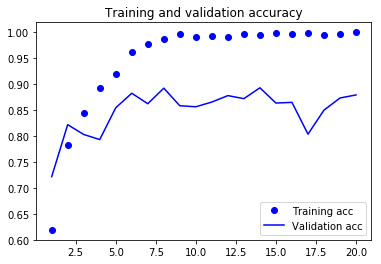

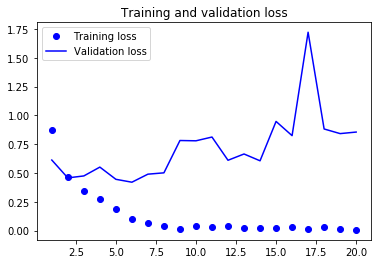

In [60]:
#plot the result
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()